In [ ]:
#import os
#os.environ['CUDA_VISIBLE_DEVICES'] = ''


In [ ]:
!pip install -U transformers


In [ ]:
!pip install pytesseract opencv-python pillow nltk


In [ ]:
!apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!apt install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


# **Upload Kaggle.json**

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mariyamkhurrum","key":"bd78da8cb233a7d4acefcf8358522ccc"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# **Download dataset**

In [ ]:
!kaggle datasets download -d urbikn/sroie-datasetv2


Dataset URL: https://www.kaggle.com/datasets/urbikn/sroie-datasetv2
License(s): other
 97% 805M/834M [00:11<00:00, 115MB/s] 
100% 834M/834M [00:11<00:00, 77.1MB/s]


# **Unzip it**

In [ ]:
!unzip sroie-datasetv2.zip -d sroie_dataset


Archive:  sroie-datasetv2.zip
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/config.json  
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/pytorch_model.bin  
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/special_tokens_map.json  
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/tokenizer_config.json  
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/training_args.bin  
  inflating: sroie_dataset/SROIE2019/layoutlm-base-uncased/vocab.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X00016469670.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X00016469671.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X51005200931.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X51005230605.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X51005230616.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X51005230621.txt  
  inflating: sroie_dataset/SROIE2019/test/box/X51005230648.txt  
  inflating: sroie_dataset/SROIE2019/test/box

# **Check the files**

In [ ]:
!ls sroie_dataset


SROIE2019


In [ ]:
!ls sroie_dataset/SROIE2019


layoutlm-base-uncased  test  train


In [ ]:
!ls sroie_dataset/SROIE2019/train | head


box
entities
img


In [ ]:
# List files inside `box/`, `entities/`, and `img/`
!ls sroie_dataset/SROIE2019/train/box | head
!ls sroie_dataset/SROIE2019/train/entities | head
!ls sroie_dataset/SROIE2019/train/img | head


X00016469612.txt
X00016469619.txt
X00016469620.txt
X00016469622.txt
X00016469623.txt
X00016469669.txt
X00016469672.txt
X00016469676.txt
X51005200938.txt
X51005230617.txt
X00016469612.txt
X00016469619.txt
X00016469620.txt
X00016469622.txt
X00016469623.txt
X00016469669.txt
X00016469672.txt
X00016469676.txt
X51005200938.txt
X51005230617.txt
X00016469612.jpg
X00016469619.jpg
X00016469620.jpg
X00016469622.jpg
X00016469623.jpg
X00016469669.jpg
X00016469672.jpg
X00016469676.jpg
X51005200938.jpg
X51005230617.jpg


# **Preview a Sample Receipt + Annotation**

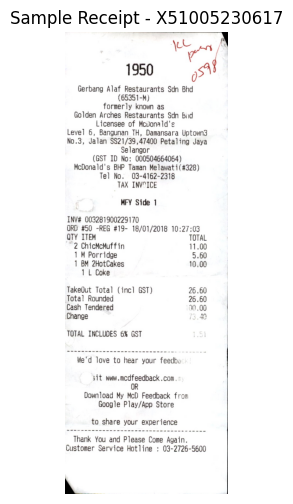

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Correct image path
img_path = 'sroie_dataset/SROIE2019/train/img/X51005230617.jpg'

# Read the image
img = cv2.imread(img_path)

# Display if image loaded successfully
if img is not None:
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Sample Receipt - X51005230617")
    plt.axis('off')
    plt.show()
else:
    print("❌ Could not load the image. Check the file path.")


In [ ]:
with open('sroie_dataset/SROIE2019/train/box/X51005230617.txt') as f:
    for i in range(5):
        print(repr(f.readline()))


'223,112,331,112,331,165,223,165,1950\n'
'45,197,477,197,477,224,45,224,GERBANG ALAF RESTAURANTS SDN BHD\n'
'192,229,316,229,316,258,192,258,(65351-M)\n'
'140,261,369,261,369,288,140,288,FORMERLY KNOWN AS\n'
'31,293,478,293,478,320,31,320,GOLDEN ARCHES RESTAURANTS SDN BHD\n'


# **Draw OCR Bounding Boxes with Words on Receipt**

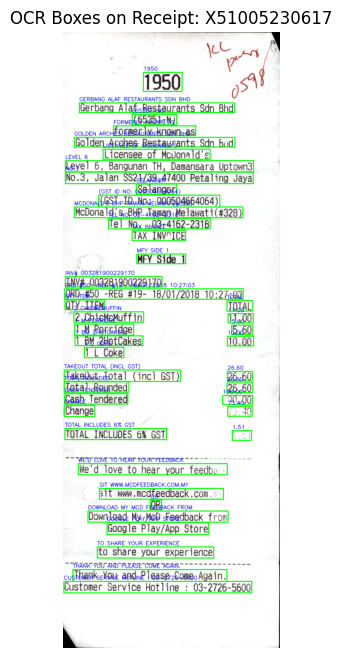

In [ ]:
import cv2
import matplotlib.pyplot as plt

sample_id = 'X51005230617'
img_path = f'sroie_dataset/SROIE2019/train/img/{sample_id}.jpg'
box_path = f'sroie_dataset/SROIE2019/train/box/{sample_id}.txt'

# Load image
image = cv2.imread(img_path)

if image is None:
    print("❌ Could not load image.")
else:
    with open(box_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split(',')
        if len(parts) >= 9:
            try:
                # Extract bounding box coordinates (top-left and bottom-right)
                x1 = int(parts[0])
                y1 = int(parts[1])
                x3 = int(parts[4])  # bottom-right x
                y3 = int(parts[5])  # bottom-right y
                word = parts[8].strip()

                # Draw rectangle and word
                cv2.rectangle(image, (x1, y1), (x3, y3), (0, 255, 0), 2)
                if word:
                    cv2.putText(image, word, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                                0.5, (255, 0, 0), 1, cv2.LINE_AA)
            except ValueError:
                continue

    # Convert BGR to RGB and show
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.title(f"OCR Boxes on Receipt: {sample_id}")
    plt.axis('off')
    plt.show()


# **Add Meaning to Each Word**

In [ ]:
# Count OCR words
with open('sroie_dataset/SROIE2019/train/box/X51005230617.txt') as f:
    box_lines = f.readlines()
    print("Words from box file:", len(box_lines))
    print("First 3 box lines:", box_lines[:3])

# Count entity labels
with open('sroie_dataset/SROIE2019/train/entities/X51005230617.txt') as f:
    entity_lines = f.readlines()
    print("Labels from entities file:", len(entity_lines))
    print("First 3 labels:", entity_lines[:3])


Words from box file: 43
First 3 box lines: ['223,112,331,112,331,165,223,165,1950\n', '45,197,477,197,477,224,45,224,GERBANG ALAF RESTAURANTS SDN BHD\n', '192,229,316,229,316,258,192,258,(65351-M)\n']
Labels from entities file: 6
First 3 labels: ['{\n', '    "company": "GERBANG ALAF RESTAURANTS SDN BHD",\n', '    "date": "18/01/2018",\n']


# **Code to Match Entity Fields with OCR**

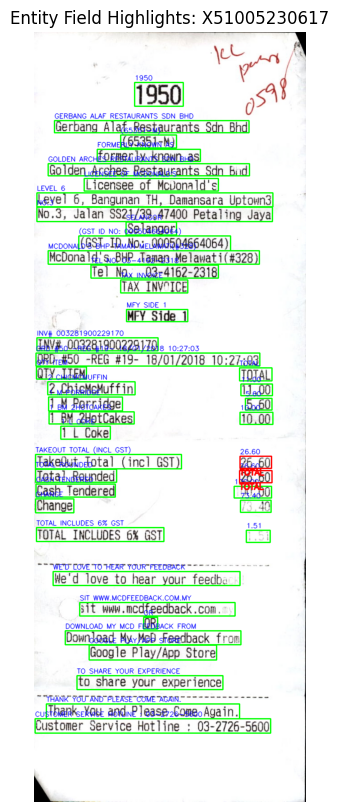

In [ ]:
import cv2
import matplotlib.pyplot as plt
import json

# === File Paths ===
sample_id = 'X51005230617'
img_path = f'sroie_dataset/SROIE2019/train/img/{sample_id}.jpg'
box_path = f'sroie_dataset/SROIE2019/train/box/{sample_id}.txt'
entity_path = f'sroie_dataset/SROIE2019/train/entities/{sample_id}.txt'

# === Load Image ===
image = cv2.imread(img_path)
if image is None:
    raise Exception("❌ Could not load image.")

# === Load Box + Word Data ===
words, boxes = [], []
with open(box_path, 'r') as f:
    for line in f:
        parts = line.strip().split(',')
        if len(parts) >= 9:
            try:
                x1, y1 = int(parts[0]), int(parts[1])
                x3, y3 = int(parts[4]), int(parts[5])
                word = parts[8].strip()
                boxes.append((x1, y1, x3, y3))
                words.append(word)
            except:
                continue

# === Load Entity Fields as JSON ===
with open(entity_path, 'r') as f:
    entity_json = json.load(f)

# === Draw All Words in Green Boxes (OCR)
for (x1, y1, x3, y3), word in zip(boxes, words):
    cv2.rectangle(image, (x1, y1), (x3, y3), (0, 255, 0), 2)
    cv2.putText(image, word, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                (255, 0, 0), 1, cv2.LINE_AA)

# === Highlight Entity Fields in Red
for key, value in entity_json.items():
    value_tokens = value.strip().split()
    value_len = len(value_tokens)

    for i in range(len(words) - value_len + 1):
        window = words[i:i + value_len]
        if [w.lower() for w in window] == [v.lower() for v in value_tokens]:
            # Get combined bounding box of matched tokens
            x1 = min(boxes[i][0], boxes[i + value_len - 1][0])
            y1 = min(boxes[i][1], boxes[i + value_len - 1][1])
            x2 = max(boxes[i][2], boxes[i + value_len - 1][2])
            y2 = max(boxes[i][3], boxes[i + value_len - 1][3])

            # Draw red box and label
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
            cv2.putText(image, key.upper(), (x1, y2 + 15), cv2.FONT_HERSHEY_SIMPLEX, 0.6,
                        (0, 0, 255), 2, cv2.LINE_AA)

# === Show Image
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(14, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title(f"Entity Field Highlights: {sample_id}")
plt.show()


# **Convert Data to LayoutLM Format**

In [ ]:
import json

def prepare_layoutlm_input(sample_id):
    box_path = f'sroie_dataset/SROIE2019/train/box/{sample_id}.txt'
    entity_path = f'sroie_dataset/SROIE2019/train/entities/{sample_id}.txt'

    words = []
    boxes = []

    # === Step 1: Read boxes and split multi-word OCR lines ===
    with open(box_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) >= 9:
                try:
                    x1, y1 = int(parts[0]), int(parts[1])
                    x2, y2 = int(parts[4]), int(parts[5])
                    raw_text = parts[8].strip()

                    # Split multi-word text into tokens
                    tokens = raw_text.split()
                    for token in tokens:
                        words.append(token)
                        boxes.append([x1, y1, x2, y2])  # Use same box for all split tokens
                except:
                    continue

    # === Step 2: Load entity fields as JSON ===
    with open(entity_path, 'r') as f:
        entity_data = json.load(f)

    labels = ['O'] * len(words)  # Default tag is "O" for all

    # === Step 3: Assign B-/I- tags based on exact match ===
    for key, value in entity_data.items():
        value_tokens = value.strip().split()
        value_len = len(value_tokens)

        for i in range(len(words) - value_len + 1):
            window = words[i:i + value_len]
            if [w.lower() for w in window] == [v.lower() for v in value_tokens]:
                labels[i] = f'B-{key.upper()}'
                for j in range(1, value_len):
                    labels[i + j] = f'I-{key.upper()}'

    # === Step 4: Return in LayoutLM-ready format ===
    layoutlm_data = {
        'id': sample_id,
        'words': words,
        'bboxes': boxes,
        'ner_tags': labels
    }

    return layoutlm_data

# === Test on one sample ===
sample_id = 'X51005230617'
layoutlm_sample = prepare_layoutlm_input(sample_id)

# === Preview the output ===
print(f"Sample ID: {layoutlm_sample['id']}\n")
for w, l in zip(layoutlm_sample['words'], layoutlm_sample['ner_tags']):
    print(f"{w:20} -> {l}")


Sample ID: X51005230617

1950                 -> O
GERBANG              -> B-COMPANY
ALAF                 -> I-COMPANY
RESTAURANTS          -> I-COMPANY
SDN                  -> I-COMPANY
BHD                  -> I-COMPANY
(65351-M)            -> O
FORMERLY             -> O
KNOWN                -> O
AS                   -> O
GOLDEN               -> O
ARCHES               -> O
RESTAURANTS          -> O
SDN                  -> O
BHD                  -> O
LICENSEE             -> O
OF                   -> O
MCDONALD'S           -> O
LEVEL                -> O
6                    -> O
NO.3                 -> O
SELANGOR             -> O
(GST                 -> O
ID                   -> O
NO:                  -> O
000504664064)        -> O
MCDONALD'S           -> O
BHP                  -> O
TAMAN                -> O
MELAWATI(#328)       -> O
TEL                  -> O
NO.                  -> O
03-4162-2318         -> O
TAX                  -> O
INVOICE              -> O
MFY                  -> O

## **Batch Convert All Receipts and Save to JSON**

In [ ]:
import json
import os
from tqdm import tqdm


def prepare_layoutlm_input(sample_id):
    box_path = f'sroie_dataset/SROIE2019/train/box/{sample_id}.txt'
    entity_path = f'sroie_dataset/SROIE2019/train/entities/{sample_id}.txt'

    words = []
    boxes = []

    # === Step 1: Read boxes and split multi-word OCR lines ===
    with open(box_path, 'r') as f:
        for line in f:
            parts = line.strip().split(',')
            if len(parts) >= 9:
                try:
                    x1, y1 = int(parts[0]), int(parts[1])
                    x2, y2 = int(parts[4]), int(parts[5])
                    raw_text = parts[8].strip()

                    # Split multi-word text into tokens
                    tokens = raw_text.split()
                    for token in tokens:
                        words.append(token)
                        boxes.append([x1, y1, x2, y2])  # Use same box for all split tokens
                except:
                    continue


    # === Step 2: Load entity fields as JSON ===
    with open(entity_path, 'r') as f:
        entity_data = json.load(f)

    labels = ['O'] * len(words)  # Default tag is "O" for all

    # === Step 3: Assign B-/I- tags based on exact match ===
    for key, value in entity_data.items():
        value_tokens = value.strip().split()
        value_len = len(value_tokens)

        for i in range(len(words) - value_len + 1):
            window = words[i:i + value_len]
            if [w.lower() for w in window] == [v.lower() for v in value_tokens]:
                labels[i] = f'B-{key.upper()}'
                for j in range(1, value_len):
                    labels[i + j] = f'I-{key.upper()}'

    # === Step 4: Return in LayoutLM-ready format ===
    layoutlm_data = {
        'id': sample_id,
        'words': words,
        'bboxes': boxes,
        'ner_tags': labels
    }

    return layoutlm_data


# === Process all samples ===
box_dir = 'sroie_dataset/SROIE2019/train/box'
sample_ids = [f.split('.')[0] for f in os.listdir(box_dir) if f.endswith('.txt')]

dataset = []

for sample_id in tqdm(sample_ids):
    try:
        record = prepare_layoutlm_input(sample_id)
        dataset.append(record)
    except Exception as e:
        print(f"❌ Error with {sample_id}: {e}")
        continue

# === Save as JSON ===
with open('sroie_layoutlm_dataset.json', 'w') as f:
    json.dump(dataset, f, indent=2)

print(f"\n✅ Dataset saved with {len(dataset)} samples.")

 29%|██▉       | 181/626 [00:00<00:00, 1801.41it/s]

❌ Error with X51005433522: list assignment index out of range


100%|██████████| 626/626 [00:00<00:00, 1787.22it/s]



✅ Dataset saved with 625 samples.


# ***`Step-by-Step LayoutLM Training (NER)`***


In [ ]:
!pip install -q transformers datasets seqeval


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


**Load JSON Dataset into HuggingFace Dataset Format**

In [ ]:
from datasets import Dataset, load_metric
import json

# Load JSON
with open("sroie_layoutlm_dataset.json", "r") as f:
    data = json.load(f)

# Convert to HuggingFace Dataset
dataset = Dataset.from_list(data)
dataset = dataset.train_test_split(test_size=0.1)  # 90% train, 10% test

# Show example
dataset


DatasetDict({
    train: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags'],
        num_rows: 562
    })
    test: Dataset({
        features: ['id', 'words', 'bboxes', 'ner_tags'],
        num_rows: 63
    })
})

**Label Mapping (NER Tags)**

In [ ]:
# Unique labels
unique_tags = set(tag for sample in dataset['train'] for tag in sample['ner_tags'])
label_list = sorted(list(unique_tags))

label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for label, i in label2id.items()}


In [ ]:
def normalize_bbox(bbox, width, height):
    """Scale coordinates to [0, 1000] range"""
    return [
        int(1000 * (bbox[0] / width)),
        int(1000 * (bbox[1] / height)),
        int(1000 * (bbox[2] / width)),
        int(1000 * (bbox[3] / height))
    ]


In [ ]:
from PIL import Image

def preprocess(example):
    # Get image size
    image_path = f"sroie_dataset/SROIE2019/train/img/{example['id']}.jpg"
    image = Image.open(image_path)
    width, height = image.size

    # Normalize bounding boxes
    norm_bboxes = [normalize_bbox(box, width, height) for box in example['bboxes']]

    # Tokenize
    encoding = tokenizer(
        example['words'],
        truncation=True,
        padding='max_length',
        max_length=512,
        is_split_into_words=True,
        return_offsets_mapping=True
    )

    word_ids = encoding.word_ids()
    labels = []
    for word_idx in word_ids:
        if word_idx is None:
            labels.append(-100)
        else:
            labels.append(label2id[example['ner_tags'][word_idx]])

    encoding['labels'] = labels + [-100] * (512 - len(labels))
    encoding['bbox'] = norm_bboxes + [[0, 0, 0, 0]] * (512 - len(norm_bboxes))

    return encoding


**Preprocess Input for LayoutLM**


In [ ]:
from transformers import LayoutLMTokenizerFast

tokenizer = LayoutLMTokenizerFast.from_pretrained("microsoft/layoutlm-base-uncased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/170 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

**Load LayoutLM Model**

In [ ]:
from transformers import LayoutLMForTokenClassification

model = LayoutLMForTokenClassification.from_pretrained(
    "microsoft/layoutlm-base-uncased",
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)
model.to("cuda")


model.safetensors:   0%|          | 0.00/451M [00:00<?, ?B/s]

Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlm-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LayoutLMForTokenClassification(
  (layoutlm): LayoutLMModel(
    (embeddings): LayoutLMEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 768)
      (y_position_embeddings): Embedding(1024, 768)
      (h_position_embeddings): Embedding(1024, 768)
      (w_position_embeddings): Embedding(1024, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): LayoutLMEncoder(
      (layer): ModuleList(
        (0-11): 12 x LayoutLMLayer(
          (attention): LayoutLMAttention(
            (self): LayoutLMSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
 

In [ ]:
encoded_dataset = dataset.map(preprocess)


Map:   0%|          | 0/562 [00:00<?, ? examples/s]

Map:   0%|          | 0/63 [00:00<?, ? examples/s]

# Training

**1. Define a Data Collator**

In [ ]:
# Ensure consistent label ordering across sessions
labels_sorted = sorted(label2id.keys())
label2id = {lbl: i for i, lbl in enumerate(labels_sorted)}
id2label = {i: lbl for lbl, i in label2id.items()}
num_labels = len(labels_sorted)
print(label2id)


{'B-ADDRESS': 0, 'B-COMPANY': 1, 'B-DATE': 2, 'B-TOTAL': 3, 'I-ADDRESS': 4, 'I-COMPANY': 5, 'I-DATE': 6, 'I-TOTAL': 7, 'O': 8}


In [ ]:
from PIL import Image

def normalize_bbox(bbox, width, height):
    return [
        int(1000 * bbox[0] / width),
        int(1000 * bbox[1] / height),
        int(1000 * bbox[2] / width),
        int(1000 * bbox[3] / height),
    ]

def preprocess_batch(examples):
    batch_encodings = tokenizer(
        examples["words"],
        is_split_into_words=True,
        truncation=True,
        max_length=512,  # LayoutLM max seq length
        return_offsets_mapping=False,
        padding=False,
    )

    all_labels = []
    all_bboxes = []
    for i, example_words in enumerate(examples["words"]):
        sample_id = examples["id"][i]
        w, h = Image.open(f"sroie_dataset/SROIE2019/train/img/{sample_id}.jpg").size
        norm_boxes = [normalize_bbox(bb, w, h) for bb in examples["bboxes"][i]]
        word_ids = batch_encodings.word_ids(batch_index=i)

        # Align labels
        example_labels = examples["ner_tags"][i]
        aligned_labels = []
        aligned_boxes = []
        prev_word = None
        for wid in word_ids:
            if wid is None:
                aligned_labels.append(-100)
                aligned_boxes.append([0,0,0,0])
            else:
                # assign label to first subtoken, and same label to continuation subtokens
                aligned_labels.append(label2id[example_labels[wid]])
                aligned_boxes.append(norm_boxes[wid])
            prev_word = wid
        all_labels.append(aligned_labels)
        all_bboxes.append(aligned_boxes)

    batch_encodings["labels"] = all_labels
    batch_encodings["bbox"] = all_bboxes
    return batch_encodings


In [ ]:
encoded_dataset = dataset.map(
    preprocess_batch,
    batched=True,
    remove_columns=dataset["train"].column_names,  # drop raw cols, keep encodings
)
encoded_dataset


Map:   0%|          | 0/562 [00:00<?, ? examples/s]

Map:   0%|          | 0/63 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels', 'bbox'],
        num_rows: 562
    })
    test: Dataset({
        features: ['input_ids', 'token_type_ids', 'attention_mask', 'labels', 'bbox'],
        num_rows: 63
    })
})

In [ ]:
import torch
from transformers.tokenization_utils_base import PreTrainedTokenizerBase
from typing import Dict, List, Any, Optional

class DataCollatorForLayoutLMTokenClassification:
    def __init__(self, tokenizer: PreTrainedTokenizerBase, pad_label_id=-100, pad_bbox=[0,0,0,0]):
        self.tokenizer = tokenizer
        self.pad_label_id = pad_label_id
        self.pad_bbox = pad_bbox

    def __call__(self, features: List[Dict[str, Any]]) -> Dict[str, torch.Tensor]:
        # pull sequence lengths
        max_len = max(len(f["input_ids"]) for f in features)
        batch = {
            "input_ids": [],
            "attention_mask": [],
            "token_type_ids": [],
            "bbox": [],
            "labels": [],
        }
        for f in features:
            pad_len = max_len - len(f["input_ids"])
            batch["input_ids"].append(f["input_ids"] + [self.tokenizer.pad_token_id]*pad_len)
            batch["attention_mask"].append(f["attention_mask"] + [0]*pad_len)
            batch["token_type_ids"].append(f.get("token_type_ids", [0]*len(f["input_ids"])) + [0]*pad_len)
            batch["bbox"].append(f["bbox"] + [self.pad_bbox]*pad_len)
            batch["labels"].append(f["labels"] + [self.pad_label_id]*pad_len)
        return {k: torch.tensor(v) for k, v in batch.items()}


In [ ]:
collator = DataCollatorForLayoutLMTokenClassification(tokenizer)


In [ ]:
from transformers import LayoutLMForTokenClassification

model = LayoutLMForTokenClassification.from_pretrained(
    "microsoft/layoutlm-base-uncased",
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
)


Some weights of LayoutLMForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlm-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device


device(type='cuda')

In [ ]:
import numpy as np
from seqeval.metrics import classification_report, f1_score, precision_score, recall_score

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=-1)
    labels = p.label_ids

    true_preds = []
    true_labels = []
    for pred_seq, label_seq in zip(preds, labels):
        pred_labels = []
        label_labels = []
        for p_i, l_i in zip(pred_seq, label_seq):
            if l_i == -100:
                continue
            pred_labels.append(id2label[p_i])
            label_labels.append(id2label[l_i])
        true_preds.append(pred_labels)
        true_labels.append(label_labels)

    return {
        "precision": precision_score(true_labels, true_preds),
        "recall": recall_score(true_labels, true_preds),
        "f1": f1_score(true_labels, true_preds),
    }


In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./layoutlm_sroie_ckpt",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    fp16=torch.cuda.is_available(),  # mixed precision if GPU
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["test"],
    tokenizer=tokenizer,
    data_collator=collator,
    compute_metrics=compute_metrics,
)

/tmp/ipython-input-41-1532480175.py:19: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()
trainer.save_model("./layoutlm_sroie_final")
tokenizer.save_pretrained("./layoutlm_sroie_final")


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:


Abort: 

**3. Define Metric Computation Function**

**4. Define TrainingArguments**

**5. Create the Trainer**

**6. Train the Model**

**7. Evaluate After Training**